# 1、PyTorch Bascis

上一节我们介绍了怎么安装 PyTorch，在深入介绍 PyTorch 之前，本节将先介绍一些 PyTorch 的基础知识，使得读者能够对 PyTorch 有一个大致的了解。


## 1.1、Tensor

Tensor 是 PyTorch 中重要的数据结构，是 张量 的英文，可以认为是一个高维数组。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。PyTorch 里面处理的单位就是一个一个的 tensor 。 Tensor 和 NumPy 的 ndarray 类似，但是 Tensor 可以使用 GPU 进行加速。Tensor 的使用和 NumPy 以及 Matlab 的接口十分相似，下面我们通过几个例子来看看 Tensor 的基本使用。

### 1.1.1、Tensor 基本用法

In [2]:
# 导入 torch 库
import torch as t

# 构建 5x3 矩阵，这时候只是分配了空间，但是未初始化
x = t.Tensor(5, 3)
x

tensor(1.00000e-42 *
       [[ 0.2060,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.4069,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])

In [3]:
# 使用 [0, 1] 均匀分布随机初始化二维数组
x = t.rand(5, 3)
x

tensor([[ 0.7261,  0.6628,  0.6221],
        [ 0.8366,  0.8685,  0.9392],
        [ 0.5753,  0.3848,  0.1666],
        [ 0.8878,  0.1466,  0.2254],
        [ 0.0756,  0.4799,  0.1177]])

In [4]:
# 查看 x 的形状
print(x.size())

torch.Size([5, 3])


In [5]:
# 查看列的个数，下面的两种写法是等价的
print(x.size()[1])
print(x.size(1))

3
3


torch.size 是 tuple 对象的子类，因此它支持 tuple 的所有操作，如 x.size()[0]

tensor 的加法有三种不同的写法，下面总结一下

In [6]:
y = t.rand(5, 3)

print('最初y')
print(y)

print('第一种加法，y的结果')
x + y # 普通加法，不改变y的内容
print(y)

print('第二种加法，y的结果')
y.add(x) # 普通加法，不改变y的内容
print(y)
# 第二种写法，还可以指定加法结果的输出目标为 result
# result = t.Tensor(5, 3)
# t.add(x, y, out=result) # 输入到 result
# result

print('第三种加法，y的结果')
y.add_(x) # inplace 加法，y变了
print(y)

最初y
tensor([[ 0.9780,  0.1765,  0.0100],
        [ 0.0436,  0.1372,  0.1617],
        [ 0.3394,  0.5091,  0.5517],
        [ 0.4899,  0.7167,  0.8781],
        [ 0.4250,  0.0023,  0.7044]])
第一种加法，y的结果
tensor([[ 0.9780,  0.1765,  0.0100],
        [ 0.0436,  0.1372,  0.1617],
        [ 0.3394,  0.5091,  0.5517],
        [ 0.4899,  0.7167,  0.8781],
        [ 0.4250,  0.0023,  0.7044]])
第二种加法，y的结果
tensor([[ 0.9780,  0.1765,  0.0100],
        [ 0.0436,  0.1372,  0.1617],
        [ 0.3394,  0.5091,  0.5517],
        [ 0.4899,  0.7167,  0.8781],
        [ 0.4250,  0.0023,  0.7044]])
第三种加法，y的结果
tensor([[ 1.7041,  0.8393,  0.6321],
        [ 0.8802,  1.0057,  1.1009],
        [ 0.9147,  0.8939,  0.7183],
        [ 1.3777,  0.8633,  1.1035],
        [ 0.5006,  0.4822,  0.8221]])


注意：函数名后面带下划线 _ 的函数会修改 Tensor 本身。例如， x.add_(y) 和 x.t_() 会改变 x ，但 x.add(y) 和 x.t() 返回一个新的 Tensor ，而 x 不变。

### 1.1.2、把 Tensor 当做 NumPy 使用

Tensor 支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与 NumPy 极为相似。并且 Tensor 和 NumPy 的数组之间的互操作非常容易且快速。这就为我们提供了一种解题思路 —— 对于 Tensor 不支持的操作，可以先转为 NumPy 数组处理，之后再转回 Tensor 。

In [7]:
# 导入 NumPy 库
import numpy as np

In [8]:
# Tensor 的选取操作与 Numpy 类似
x[:, 1] # 选取第二列的所有数据

tensor([ 0.6628,  0.8685,  0.3848,  0.1466,  0.4799])

In [9]:
# 创建一个全为 1 的 Tensor
a = t.ones(5)
a

tensor([ 1.,  1.,  1.,  1.,  1.])

In [10]:
# 将 Tensor 转化为 numpy 的 ndarray，使用的是 tensor.numpy() 方法
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [11]:
# 同样，我们也可以将 numpy 的ndarray 转化为 tensor
a = np.ones(5)
b = t.from_numpy(a)
print(a)
print(b)

[ 1.  1.  1.  1.  1.]
tensor([ 1.,  1.,  1.,  1.,  1.], dtype=torch.float64)


Tensor 和 NumPy 对象共享内存，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变。

下面我们总结一下：

In [13]:
# 创建一个 numpy ndarray
numpy_tensor = np.random.randn(10, 20)

我们可以使用下面两种方式将 numpy 的 ndarray 转换到 tensor 上

In [16]:
pytorch_tensor1 = t.Tensor(numpy_tensor)
pytorch_tensor2 = t.from_numpy(numpy_tensor)

使用以上两种方法进行转换的时候，会直接将 NumPy ndarray 的数据类型转换为对应的 PyTorch Tensor 数据类型

同时我们也可以使用下面的方法将 PyTorch tensor 转换为 numpy ndarray

Tensor 可通过 .cuda 方法转为 GPU 的 Tensor ，从而享受 GPU 带来的加速运算。

In [19]:
# 如果 pytorch tensor 在 cpu 上
numpy_array = pytorch_tensor1.numpy()

# 如果 pytorch tensor 在 gpu 上
# numpy_array = pytorch_tensor1.cpu().numpy()

需要注意的是，GPU 上的 Tensor 不能直接转换为 NumPy ndarray ，需要使用 .cpu() 先将 GPU 上的 tensor 转到 CPU 上，类型跟之前保持一致

PyTorch Tensor 使用 GPU 加速

我们可以使用以下两种方式将 Tensor 放到 GPU 上

In [20]:
# 第一种方式是定义 cuda 数据类型
# dtype = t.cuda.FloatTensor # 定义默认的 GPU 的数据类型
# gpu_tensor = torch.randn(10, 20).type(dtype)

# 第二种方式更简单，推荐使用
# gpu_tensor = torch.randn(10, 20).cuda(0) # 将 tensor 放到第一个 GPU 上
# gpu_tensor = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上

使用第一种方式将 tensor 放到 GPU 上的时候会将数据类型转换成定义的类型,而使用第二种方式能够直接将 tensor 放到 GPU 上,类型跟之前保持一致

推荐在定义 tensor 的时候就明确数据类型，然后直接使用第二种方法将 tensor 放到 GPU 上

而将 tensor 放回 CPU 的操作非常简单

In [23]:
# cpu_tensor = gpu_tensor.cpu()

我们能够访问到 Tensor 的一些属性

In [24]:
# 可以通过下面两种方式得到 tensor 的大小
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

torch.Size([10, 20])
torch.Size([10, 20])


In [25]:
# 得到 tensor 的数据类型
print(pytorch_tensor1.type())

torch.FloatTensor


In [26]:
# 得到 tensor 的维度
print(pytorch_tensor1.dim())

2


In [27]:
# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

200


#### 小练习

根据我们上面的介绍，以及连接 https://pytorch.org/docs/stable/tensors.html 了解 tensor 的数据类型，创建一个 float64、大小是 3 x 2、随机初始化的 tensor ，将其转化为 numpy 的 ndarray ，输出其数据类型

参考输出： float64

In [30]:
# 答案
x = t.randn(3, 2)
x = x.type(t.DoubleTensor)
x_array = x.numpy()
print(x_array.dtype)

float64


### 1.1.3、Tensor 的操作

Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，下面我们来列举其中的一些操作

In [32]:
tensor1 = t.ones(2, 2)
print(tensor1)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [33]:
print(tensor1.type())

torch.FloatTensor


In [34]:
# 将其转化为整形
tensor1 = tensor1.long()
# tensor1 = tensor1.type(t.LongTensor)
print(tensor1)

tensor([[ 1,  1],
        [ 1,  1]])


In [35]:
# 再将其转回 float
tensor1 = tensor1.float()
# tensor1 = tensor1.type(t.FloatTensor)
print(tensor1)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [36]:
# 创建一个新的 tensor
tensor2 = t.randn(4, 3)
print(tensor2)

tensor([[-0.3999,  0.0942, -0.1311],
        [-0.9040,  0.4237, -0.2105],
        [-0.9978,  0.3036, -1.4675],
        [ 1.4417, -1.1351,  0.0788]])


In [37]:
# 沿着行取最大值
max_value, max_idx = t.max(tensor2, dim=1)
# 每一行的最大值
max_value

tensor([ 0.0942,  0.4237,  0.3036,  1.4417])

In [38]:
# 每一行最大值的下标
max_idx

tensor([ 1,  1,  1,  0])

In [40]:
# 沿着行对 tensor2 求和
sum_x = t.sum(tensor2, dim=1)
print(sum_x)

tensor([-0.4369, -0.6907, -2.1616,  0.3854])


In [42]:
# 增加维度或者减少维度
print(tensor2.shape)
tensor2 = tensor2.unsqueeze(0) # 在第一维增加
print(tensor2.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [43]:
tensor2 = tensor2.unsqueeze(1) # 在第二维增加
print(tensor2.shape)

torch.Size([1, 1, 4, 3])


In [44]:
tensor2 = tensor2.squeeze(0) # 减少第一维
print(tensor2.shape)

torch.Size([1, 4, 3])


In [45]:
tensor2 = tensor2.squeeze() # 将 tensor 中所有的一维全部都去掉
print(tensor2.shape)

torch.Size([4, 3])


In [46]:
tensor3 = t.randn(3, 4, 5)
print(tensor3.shape)

# 使用 permute 和 transpose 进行维度交换
tensor3 = tensor3.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(tensor3.shape)

tensor3 = tensor3.transpose(0, 2) # transpose 交换 tensor 中的两个维度
print(tensor3.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 3, 4])


In [47]:
# 使用 view 对 tensor 进行 reshape
tensor4 = t.randn(3, 4, 5)
print(tensor4.shape)

tensor4 = tensor4.view(-1, 5) # -1 表示任意的大小， 5 表示第二维变成 5
print(tensor4.shape)

tensor4 = tensor4.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(tensor4.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


In [51]:
tensor5 = t.randn(3, 4)
tensor6 = t.randn(3, 4)

# 两个 tensor 求和
tensor7 = tensor5 + tensor6
# z = t.add(x, y)

另外，pytorch 中大多数的操作都支持 inplace 操作，也就是可以直接对 tensor 进行操作而不是另外开辟内存空间，方式非常简单，一般都是在操作的符号后面加 _ ，比如

In [52]:
tensor8 = t.ones(3, 3)
print(tensor8.shape)

# unsqueeze 进行 inplace
tensor8.unsqueeze_(0)
print(tensor8.shape)

# transpose 进行 inplace
tensor8.transpose_(1, 0)
print(tensor8.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])


In [53]:
t1 = t.ones(3, 3)
t2 = t.ones(3, 3)
print(t1)

# add 进行 inplace
t1.add_(t2)
print(t1)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]])


#### 小练习

查看 https://pytorch.org/docs/stable/tensors.html 了解 tensor 更多的 api ，实现下面的要求

创建一个 float32、 4x4 的全为 1 的矩阵，将矩阵正中间 2x2 的矩阵，全部修改成 2

参考输出

![](img/mini_1.png)

## 1.2、Variable

tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 Variable 。autograd.Variable 是 Autograd 中的核心类，它简单封装了Tensor，并支持几乎所有 Tensor 有的操作。Tensor在被封装为 Variable 之后，可以调用它的 .backward 实现反向传播，自动计算所有梯度。

Variable 主要包含三个属性：

 - data ：保存 Variable 所包含的 Tensor 。
 - grad ：保存 data 对应的梯度， grad 也是个 Variable，而不是 Tensor，它和 data 的形状一样。
 - grad_fn ：指向一个 Function 对象，这个 Function 用来反向传播计算输入的梯度。

In [54]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable

In [55]:
x_tensor = t.randn(10, 5)
y_tensor = t.randn(10, 5)

# 将 tensor 变成 Variable
x = Variable(x_tensor, requires_grad=True) # 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
y = Variable(y_tensor, requires_grad=True)

In [56]:
z = t.sum(x + y)

In [57]:
print(z.data)
print(z.grad_fn)

tensor(11.2499)


上面我们打出了 z 中的 tensor 数值，同时通过 grad_fn 知道了其是通过 sum 这种方式得到的

In [58]:
# 求 x 和 y 的梯度
z.backward()

print(x.grad)
print(y.grad)

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]])
tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]])


通过 .grad 我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制，非常方便，下一节我们再具体讲解自动求导。

#### 小练习

尝试构建一个函数 $y = x^2$ ，然后求 x = 2 的导数。

参考输出：4

提示：

$y = x^2$ 的图像如下

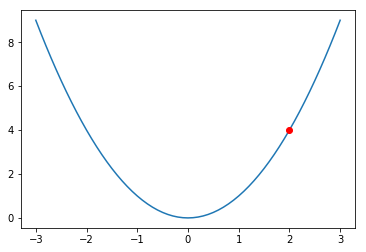

In [59]:
import matplotlib.pyplot as plt
x = np.arange(-3, 3.01, 0.1)
y = x ** 2
plt.plot(x, y)
plt.plot(2, 4, 'ro')
plt.show()

In [61]:
# 答案
x = Variable(t.FloatTensor([2]), requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

tensor([ 4.])


下一次课程我们将会从导数展开，了解 PyTorch 的自动求导机制。

#### 附加

对于 backward 不理解的同学，看这个链接：https://l1aoxingyu.github.io/2017/07/10/backward/ 可以说写的简直不能再好了。